In [1]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import utils as utl
import html_evaluation_portafoglio as hep
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import monthly_returns

In [5]:
list_securities = ['SSO','UBT', 'UST', 'UGL']
window = 30 #days

#main
data = hep.create_dataframe(list_securities)
#print(data)
data_perc = hep.perc_df(data)
inv_volat_data = hep.df_inverse_volatility(data_perc, window)
data_wheighted = hep.df_wheighted(inv_volat_data)
data_earnings = hep.df_earnings(data_wheighted, data_perc)
data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
data_earnings.dropna(inplace = True)
data_earn_eq_weight.dropna(inplace = True)
#print(data_earn_eq_weight)

In [3]:
#param
figsize=(10, 5)
fontname='Arial'
annot_size=10
square=False
cbar = False
cmap = LinearSegmentedColormap.from_list('RedGreen', ['crimson', 'gold', 'lime'])
eoy=False
compounded=True

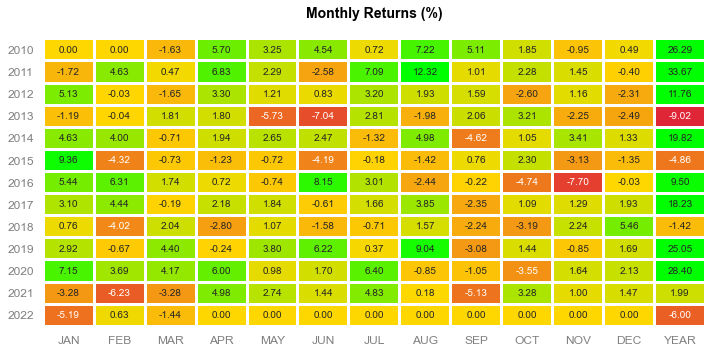

In [7]:
#crate the returns table plus the return over the year


fig, ax = plt.subplots(figsize=figsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.set_title('Monthly Returns (%)\n', fontsize=14, y=.995,
             fontname=fontname, fontweight='bold', color='black')

returns = monthly_returns(data_earnings['Tot'], eoy=eoy,
                                  compounded=compounded) * 100
returns['YEAR'] =returns.sum(axis=1)

ax = sns.heatmap(returns, ax=ax, annot=True, center=0,
                annot_kws={"size": annot_size}, vmax = 10,
                fmt="0.2f", linewidths=2,
                square=square, cbar=cbar, cmap = cmap,
                cbar_kws={'format': '%.0f%%'})

ax.tick_params(colors="#808080")
plt.xticks(rotation=0, fontsize=annot_size*1.2)
plt.yticks(rotation=0, fontsize=annot_size*1.2)

try:
    plt.subplots_adjust(hspace=0, bottom=0, top=1)
except Exception:
    pass
try:
    fig.tight_layout(w_pad=0, h_pad=0)
except Exception:
    pass
